<center><img src="images/header.png" width=400></center>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Домашняя работа</center></h2>

In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,10)

# Задача про датчики на руках

В этом задании мы применим метод главных компонент на многомерных данных и постараемся найти оптимальную размерность признаков для решения задачи классификации

Исходными [данными](http://archive.ics.uci.edu/ml/machine-learning-databases/auslan2-mld/auslan.data.html) являются показания различных сенсоров, установленных на руках человека, который умеет общаться на языке жестов.

В данном случае задача ставится следующим образом: по показаниям датчиков (по 11 сенсоров на каждую руку) определить слово, которое было показано человеком.

Как можно решать такую задачу?

Показания датчиков представляются в виде временных рядов. Посмотрим на показания для одного из "слов"

In [5]:
# Загружаем данные сенсоров
df_database = pd.read_csv('./data/sign_database.csv')

# Загружаем метки классов
sign_classes = pd.read_csv('./data/sign_classes.csv', index_col=0, header=0, names=['id', 'class'])

In [6]:
# Столбец id - идентификаторы "слов"
# Столбец time - метка времени
# Остальные столбцы - показания серсоров для слова id в момент времени time

df_database.head()

,x_l,x_r,y_l,y_r,z_l,z_r,roll_l,roll_r,pitch_l,pitch_r,...,forefinger_l,forefinger_r,middle_l,middle_r,ring_l,ring_r,little_l,little_r,id,time
0,-0.097816,-0.127761,-0.029051,0.537977,0.249162,0.508908,0.239445,0.039819,0.0,0.007009,...,0.369149,0.381857,0.570995,0.343431,0.0,0.000000,0.0,0.133088,0,0
1,-0.102460,-0.126734,-0.029230,0.537758,0.246477,0.507236,0.240116,0.039057,0.0,0.007009,...,0.326618,0.402561,0.595044,0.291571,0.0,0.000000,0.0,0.084865,0,1
2,-0.103085,-0.125618,-0.028605,0.537464,0.244890,0.507273,0.234753,0.039057,0.0,0.007494,...,0.295135,0.436131,0.639491,0.242470,0.0,0.000000,0.0,0.026230,0,2
3,-0.102639,-0.126020,-0.028873,0.537306,0.244890,0.507639,0.232072,0.026864,0.0,0.009431,...,0.239311,0.521583,0.723905,0.224264,0.0,0.014668,0.0,0.015033,0,3
4,-0.105139,-0.127538,-0.028917,0.537513,0.244816,0.506626,0.234083,0.026864,0.0,0.008947,...,0.199478,0.675103,0.786566,0.235298,0.0,0.010813,0.0,0.000815,0,4


In [7]:
sign_classes.shape

(2565, 1)

In [8]:
df_database.columns

Index(['x_l', 'x_r', 'y_l', 'y_r', 'z_l', 'z_r', 'roll_l', 'roll_r', 'pitch_l',
       'pitch_r', 'yaw_l', 'yaw_r', 'thumb_l', 'thumb_r', 'forefinger_l',
       'forefinger_r', 'middle_l', 'middle_r', 'ring_l', 'ring_r', 'little_l',
       'little_r', 'id', 'time'],
      dtype='object')

In [9]:
# Выберем одно из слов с идентификатором = 0
sign0 = df_database.query('id == 0')\
                   .drop(['id'], axis=1)\
                   .set_index('time')

<AxesSubplot:xlabel='time'>

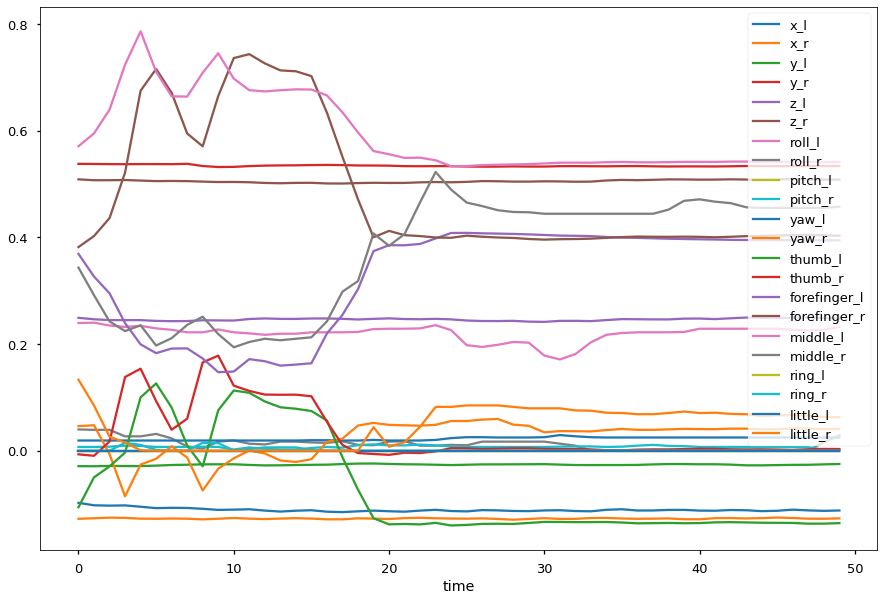

In [10]:
sign0.plot()

Для каждого из "слов" у нас есть набор показаний сенсоров с разных частей руки в каждый момент времени.

Идея нашего подхода будет заключаться в следующем – давайте для каждого сенсора составим набор характеристик (например, разброс значений, максимальное, минимальное, среднее значение, количество "пиков", и т.п.) и будем использовать эти новые "признаки" для решения задачи классификации.

## Расчет новых признаков

In [11]:
from sklearn.preprocessing import LabelEncoder

In [10]:
import tsfresh
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings, EfficientFCParameters


sign_features = extract_features(df_database, column_id='id', column_sort='time',
                                 default_fc_parameters=EfficientFCParameters(),
                                 impute_function=impute)

enc = LabelEncoder()
enc.fit(sign_classes.loc[:, 'class'])
sign_classes.loc[:, 'target'] = enc.transform(sign_classes.loc[:, 'class'])

sign_features_filtered = select_features(sign_features, sign_classes.loc[:, 'target'])

filepath = './data/tsfresh_features_filt.csv.gz'
sign_features_filtered.to_csv(filepath, compression='gzip')

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [13]:
sign_features_filtered.shape

(2565, 11517)

In [14]:
sign_features_filtered.head()

,Unnamed: 0,ring_r__maximum,"ring_r__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","ring_r__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","ring_r__fft_coefficient__attr_""abs""__coeff_2","ring_r__linear_trend__attr_""stderr""",ring_r__quantile__q_0.9,"ring_r__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""",ring_r__variance,ring_r__standard_deviation,...,forefinger_l__large_standard_deviation__r_0.15000000000000002,little_r__symmetry_looking__r_0.15000000000000002,z_l__symmetry_looking__r_0.35000000000000003,roll_r__large_standard_deviation__r_0.25,roll_r__large_standard_deviation__r_0.45,little_r__symmetry_looking__r_0.05,pitch_l__symmetry_looking__r_0.05,z_l__large_standard_deviation__r_0.45,little_l__symmetry_looking__r_0.05,y_l__symmetry_looking__r_0.35000000000000003
0,0,0.014764,0.998626,0.000174,0.047854,0.000034,0.006166,0.000423,0.000015,0.003881,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.017579,0.017579,0.000180,0.045183,0.000027,0.003599,0.000397,0.000012,0.003399,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.043917,0.043917,0.000737,0.059952,0.000092,0.028252,0.001034,0.000142,0.011921,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.061037,0.061037,0.001453,0.402618,0.000127,0.047034,0.001777,0.000314,0.017728,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
sign_features_filtered.columns

Index(['Unnamed: 0', 'ring_r__maximum',
       'ring_r__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"',
       'ring_r__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"',
       'ring_r__fft_coefficient__attr_"abs"__coeff_2',
       'ring_r__linear_trend__attr_"stderr"', 'ring_r__quantile__q_0.9',
       'ring_r__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"max"',
       'ring_r__variance', 'ring_r__standard_deviation',
       ...
       'forefinger_l__large_standard_deviation__r_0.15000000000000002',
       'little_r__symmetry_looking__r_0.15000000000000002',
       'z_l__symmetry_looking__r_0.35000000000000003',
       'roll_r__large_standard_deviation__r_0.25',
       'roll_r__large_standard_deviation__r_0.45',
       'little_r__symmetry_looking__r_0.05',
       'pitch_l__symmetry_looking__r_0.05',
       'z_l__large_standard_deviation__r_0.45',
       'little_l__symmetry_looking__r_0.05',
       'y_l__symmetry_looking__r_0.35000000000000003'],
    

In [16]:
enc = LabelEncoder()
enc.fit(sign_classes.loc[:, 'class'])
sign_classes.loc[:, 'target'] = enc.transform(sign_classes.loc[:, 'class'])

## Базовая модель

В результате у нас получилось очень много признаков (11516 или больше), давайте применим метод главных компонент, чтобы получить сжатое признаковое представление, сохранив при этом предиктивную силу в модели.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Создадим бейзлайн без уменьшения размерности. Гиперпараметры модели подбирались произвольно

In [ ]:
# Подготовим данные на вход в модель

# признаки
X = sign_features_filtered.values

# классы
y = sign_classes.target.values

In [ ]:
X.shape

(2565, 11517)

In [ ]:
y[:100]

array([ 3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14,
       14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19,
       20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25,
       25, 26, 26, 26, 27, 27, 27,  0,  0,  0, 28, 28, 28, 29, 29, 29, 30,
       30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35])

In [ ]:
# Будем делать кросс-валидацию на 5 фолдов
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')

In [ ]:
base_cv_scores.mean()

0.9196881091617932

## Метод главных компонент (5 баллов)

* (1) Добавьте в пайплайн `base_model` шаг с методом главных компонент. Начиная с версии 0.18 в sklearn добавили разные солверы для PCA. Дополнитенльно задайте в модели следующие параметры: `svd_solder = "randomized"` и `random_state=123`. Остальные гиперпараметры модели и способ кросс-валидации оставьте без изменений
* (1 + 2) Найдите такое наименьшее количество главных компонент, что качество нового пайплайна превыcит 90%. За +2 бала найдите решение не полным перебором (руками перебрать пару значений, тоже считается полным перебором). Можете считать, что функция зависимости качества от количества компонент монотонно неубывающая. 
* (1) Укажите долю объяснённой дисперсии при найденной настройке PCA  (для этого надо обучить PCA на всех данных). Долю объясненной дисперсии можно найти в атрибуте `explained_variance_ratio`

1)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(svd_solver = "randomized", random_state=123)),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')
base_cv_scores.mean()

0.9196881091617932

2) С перебором

In [ ]:
from tqdm import tqdm_notebook
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
for n in tqdm_notebook(np.arange(1, 90, 3)):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    base_model = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n, svd_solver = "randomized", random_state=123)),
        ('clf', KNeighborsClassifier(n_neighbors=9))
    ])

    base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')
    accuracy.append(base_cv_scores.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/30 [00:00<?, ?it/s]

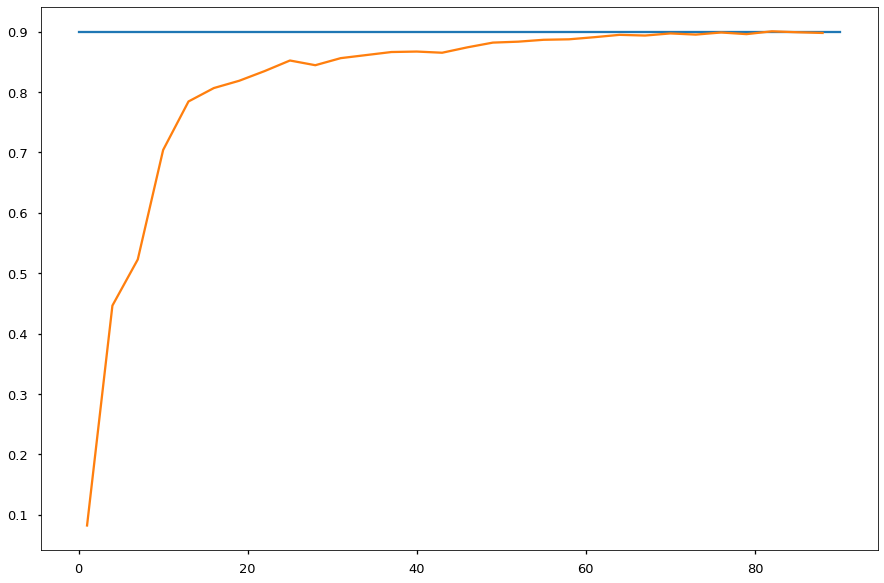

In [ ]:
plt.plot([0, 90], [0.9, 0.9])
plt.yticks(np.arange(0, 1, 0.1))
plt.plot(np.arange(1, 90, 3), accuracy)

In [ ]:
t = np.array(accuracy)
min_n = min(np.where(t > 0.9)[0]) * 3 + 1
print("min n_components, where avg accuracy > 90%: ", min_n)

min n_components, where avg accuracy > 90%:  82


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=min_n, svd_solver = "randomized", random_state=123)),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')
base_cv_scores.mean()

0.9005847953216375

3)

In [ ]:
pca = PCA(n_components = min_n, svd_solver = "randomized", random_state=123)
X_transformed = pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
pca_exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)[:10]
pca_exp_var_ratio_cumsum

array([0.73900451, 0.84117271, 0.90151818, 0.95360138, 0.97011561,
       0.98612192, 0.99257816, 0.99900055, 1.        , 1.        ])

Попытка на те 2 балла без перебора

N components, where explained_varience almost 1:  9


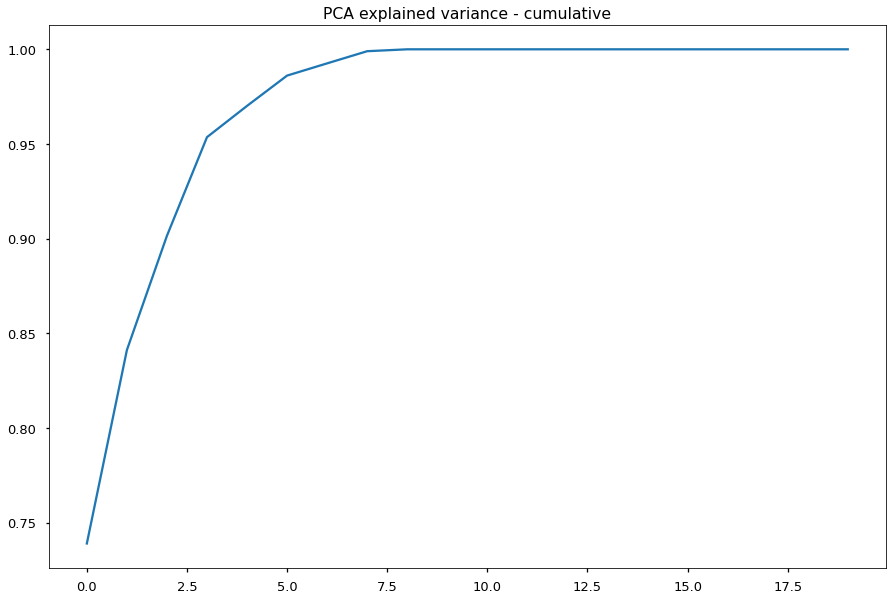

In [ ]:
pca = PCA(n_components = 20, svd_solver = "randomized", random_state=123)
pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
t = np.zeros_like(exp_var_ratio)
np.cumsum(exp_var_ratio, out=t)
print("N components, where explained_varience almost 1: ", t[t<0.999999].size + 1)
plt.title("PCA explained variance - cumulative")
plt.plot(t)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 8, svd_solver = "randomized", random_state=123)),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')
base_cv_scores.mean()

0.5614035087719299

//<b>не понимаю</b>, что я не так сделал, вся же изменчивость уже укладывается в 8 компонент, почему тогда такая точность слабая... (<b>напишите</b> пожалуйста, где посмотреть, что почитать)

# Задача про кластеризацию текстов

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [17]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


In [18]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Спорт                                            100
Проишествия  РФ                                  100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [ ]:
df.loc[:, 'event'].value_counts()

Чемпионат мира по хоккею                            102
Теракт в Барселоне                                  100
Законопроект о курортных сборах                     100
Путин и Меркель в Сочи                              100
Передача РПЦ Исаакиевского собора                   100
Акции протеста 12 июня                              100
Теракт в Лондоне                                    100
Ураган в Москве                                     100
Кубок конфедерации FiFA                             100
Умер Евгений Евтушенко                              100
Саммит G20                                          100
Митинг в Москве против коррупции                    100
Единый день голосования                             100
Умер Виталий Чуркин                                  84
Убит Денис Вороненков                                82
Парламентские выборы в Великобритании                82
Горячая линия Президента Путина                      62
Фильм “Он вам не Димон”                         

Попробуем кластеризовать документы (каким-либо методом) и сравним полученное разбиение с данными рубликами с помощью ARI

## Стандартная предобработка текстов

Ниже выполняется набор операций по предобработке текстов. Возможно на этом курсе про это не будет идти речь, однако идея довольно простая. Просто следите за комментариями =)

In [ ]:
df.text[0] # Так выглядит первая статья до преобработки

' В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИСААКИЕВСКОГО СОБОРА РПЦ В Санкт-Петербурге люди устроили акцию протеста против передачи Исаакиевского собора в безвозмездное пользование РПЦ. Жители Петербурга собрались на Исаакиевской площади, чтобы высказаться против передачи Исаакиевского собора в безвозмездное пользование РПЦ, передает ТАСС. Акция проходит в формате встречи с депутатами Законодательного собрания города и не требует согласования с властями. Участники акции не используют какую-либо символику и плакаты, а также мегафоны или средства звукоусиления. По словам депутата Алексея Ковалева, на Исаакиевскую площадь пришло примерно тысяча человек. Перед участниками протеста выступили депутаты местного парламента Борис Вишневский и Максим Резник, которые заявили о том, что потребуют отмены решения Смольного. Вишневский сообщил, что акция будет проходить в виде встречи депутатов с избирателями. "Закон Санкт-Петербурга предоставляет нам право встречаться с избирателями, такую встречу

In [ ]:
import re

# Оставляем только кириллические символы
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Удаляем стоп-слова
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""
    
df.text = df.text.apply(remove_stopwords)   

In [ ]:
!pip install pymystem3
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz

--2021-11-21 19:54:18--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.243, 5.45.205.241, 5.45.205.244, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.243|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2021-11-21 19:54:20--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.1’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

In [ ]:
# %%time 
from pymystem3 import Mystem


# нормализуем текст
bin_path = "mystem-3.0-linux3.1-64bit.tar.gz"
m = Mystem(bin_path)
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

# df.text = df.text.apply(lemmatize)

In [ ]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']

# Еще кое-что удаляем
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [ ]:
df.text[0] # так выгладит первая статья после предобработки

'петербурге прошел митинг против передачи исаакиевского собора рпц санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора безвозмездное пользование рпц жители петербурга собрались исаакиевской площади высказаться против передачи исаакиевского собора безвозмездное пользование рпц передает тасс акция проходит формате встречи депутатами законодательного собрания города требует согласования властями участники акции используют какую либо символику плакаты мегафоны средства звукоусиления словам депутата алексея ковалева исаакиевскую площадь пришло примерно тысяча человек участниками протеста выступили депутаты местного парламента борис вишневский максим резник которые заявили потребуют отмены решения смольного вишневский сообщил акция проходить виде встречи депутатов избирателями закон санкт петербурга предоставляет нам право встречаться избирателями такую встречу проведем расскажем защищаем интересы передаче собора сказал парламентарий очередь директор музея исаа

## Вычисление сходства (1 балл)

С помощью `TfidfVectorizer` и `pairwise_distances` расчитайте **косинусное** расстояние между всеми парами документов к корпусе.

Про векторизацию текстов с помощью `CountVectorizer` или `TfidfVectorizer` можно почитать [тут](https://www.machinelearningmastery.ru/gentle-introduction-bag-words-model/) 

Запишите результат в переменную `S`

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [ ]:
vect = TfidfVectorizer()
texts = df.text.values

In [ ]:
texts_transformed = vect.fit_transform(texts)

In [ ]:
# S = (texts_transformed * (texts_transformed.T)).toarray() # такая же картина

In [ ]:
S = pairwise_distances(texts_transformed, metric='cosine')

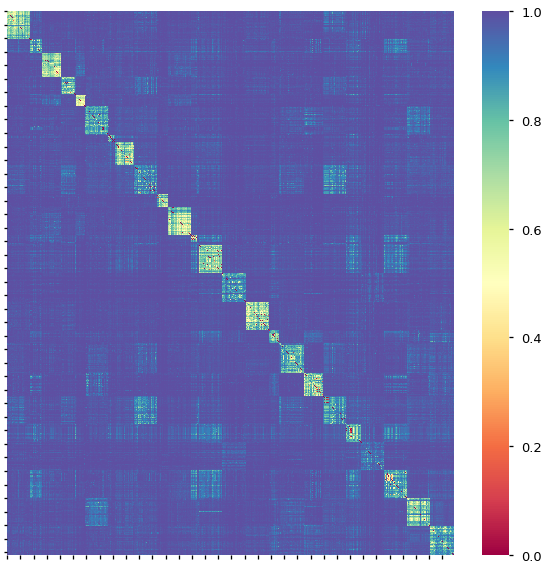

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(data=S, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

Вы должны пронаблюдать, что между некоторыми текстами есть довольно высокое сходство по содержанию слов - мы видим, что вдоль диагонали матрицы попарых расстояний есть "блоки" по похожести. 

Нам конечно же повезло, так как тексты заранее были удачно упорядочены. В реальности такой живописной картины мы скорее всего не увидим.

Попробуем их кластеризовать

## DBSCAN (4 балла)
* (2) Воспользуйтесь методикой оценки параметров для алгоритма DBSCAN. Не копипастите `min_pts = 2` из семинара! Используйте **косинусную** меру близости.
* (1) Выделите кластеры. Для каждого кластера (кроме -1, если он будет) выведите несколько текстов и умозрительно определите его тематику. Можете подсмотреть в исходные тематики корпуса
* (1) Оцените сходство с изначальными рубриками визуально (с помощью матрицы перемешивания) и с помощью [Adjusted Rand Index](https://en.wikipedia.org/wiki/Rand_index)

# 1) Оценка eps

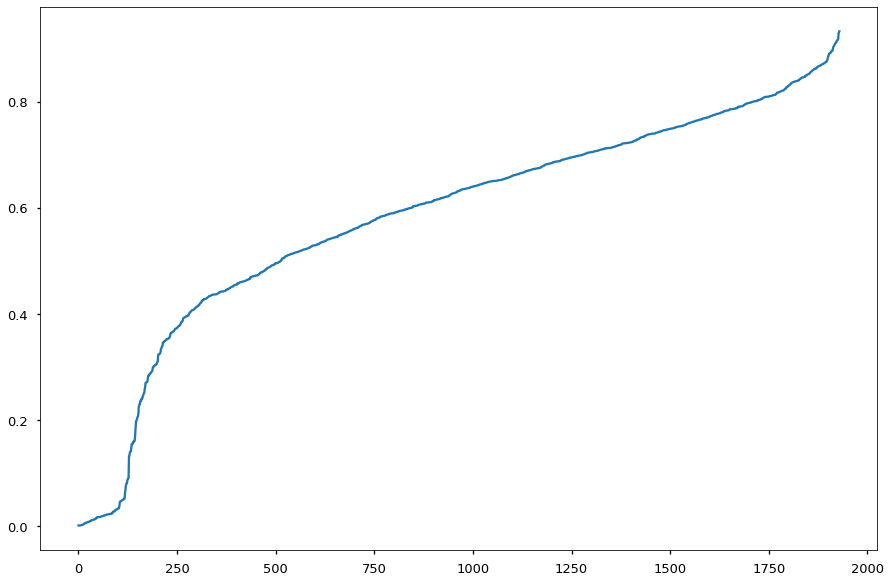

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(metric="precomputed")
dist, ind = nn.fit(S).kneighbors(S)
# dist
dist_last = dist[:, -1]
dist_last = np.sort(dist_last)
# dist_last
plt.plot(dist_last)

eps = 0,79 <br>
min_samples = 40 (из списка df.loc[:, 'class'].value_counts())

In [ ]:
dbscan = DBSCAN(eps=0.79, metric="precomputed", min_samples=40)
dbscan.fit(S)
labels = dbscan.labels_

In [ ]:
pd.crosstab(df.loc[:, 'class'], labels).T

class,Важные мировые события,Внутренняя политика РФ,Внутренняя политика РФ: оппозиция,Внутренняя политика: культура,Международные отношения,Международные отношения: Криминальная хроника,Проишествия РФ,Спорт,Спорт,Теракты,Технологии
col_0,,,,,,,,,,,
-1,95,17,109,1,28,0,4,100,44,9,2
0,0,99,0,0,0,0,0,0,0,0,0
1,84,0,0,0,0,0,0,0,0,0,0
2,0,0,59,0,0,0,0,0,0,0,0
3,41,0,0,99,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,190,0
5,0,0,0,0,0,82,0,0,0,0,0
6,0,0,108,0,0,0,96,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,47


Первый спорт улетает в -1 класс, потому что у них разношёрстные новости в подборке, вот список ближайших соседей:

In [ ]:
a = df.loc[:, "class"]
a[a=="Спорт"]

1530    Спорт
1531    Спорт
1532    Спорт
1533    Спорт
1534    Спорт
        ...  
1625    Спорт
1626    Спорт
1627    Спорт
1628    Спорт
1629    Спорт
Name: class, Length: 100, dtype: object

In [ ]:
index = np.random.randint(1530, np.where(a == "Спорт")[0].size + 1530)
print(dist[index])
print(ind[index])
print(index)
# np.random.randint(np.where(a == "Спорт")[0].size)

[0.         0.65401366 0.72229722 0.74202652 0.74307704]
[1535 1582 1600 1569 1571]
1535


# 2) Выделение кластеров

Класс 0 (Внутренняя политика, все новости про собор отдельно выделились)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 0))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  0
Text:  национальная служба новостей москва января петербурге прошла акция противников передачи исаакиевского собора рпц петербурге прошла акция противников передачи исаакиевского собора рпц выразить протест вышли около сотни человек акция прошла формате встречи депутатов петербургского законодательного собрания избирателями потребовала предварительного согласования собор закрыт сегодня завершил работу несколько часов раньше избежать беспорядков время проведения акции пишет сайт
Class:  Внутренняя политика РФ
Event:  Передача РПЦ Исаакиевского собора 


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  0
Text:  открытая россия москва января митинг против передачи исаакиевского собора рпц собрал петербуржцев митинг против передачи исаакиевского собора рпц собрал оценкам организаторов около тысячи человек очевидцы события соцсетях приводят большие цифры тысячи человек требуют отставки плтавченко исаакиевской площади арсений веснин акция проходила формате встречи депутатами отличие москвы питере запрещено встрече собравшимися выступили руководитель питерского отделения открытой россии андрей пивоваров депутаты законодательного собрания петербурга борис вишневский максим резник алексей ковалев андрей пивоваров объявил сегодня подана заявка митинг января марсово поле защитим исаакиевский собор вместе вадим суходольский января г наряды полиции препятствовали проведению встречи патрулируя территорию изъяли активистов несколько плакатов встрече принято решение подать заявку проведение полноценного митинга января января губернатора санкт петербурга георгий полтавченко заявил собор пер

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  0
Text:  ислам москва января петербурге прошел митинг против передачи исаакиевского собора рпц января культурной столице россии прошел митинг против передачи исаакиевского собора русской православной церкви рпц оценкам организаторов мероприятии проведенном формате встречи депутатами приняли участие около тысячи человек пишет рбк передаче собора рпц января сообщил губернатор петербурга геннадий полтавченко словам собор сохранит музейно просветительскую функцию однако министерстве культуры усомнились возможности против передачи собора рпц выступили союз музеев россии оппозиция петербурга коалицию вошли партии яблоко справедливая россия парнас открытая россия партия роста
Class:  Внутренняя политика РФ
Event:  Передача РПЦ Исаакиевского собора 


Класс 1 (Важные мировые события)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 1))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  1
Text:  новости москва февраля первые цветы память виталии чуркине появились здания мид москве москва февраля тасс первые цветы свечи появились главного входа центральное здание мид рф смоленской площади москве знак скорби постоянном представителе россии оон виталии чуркине российский дипломат скоропостижно скончался нью йорке день своего летия сотрудники дипведомства простые москвичи приносят красные гвоздики розы цветами белый лист бумаги черными буквами умер виталий чуркин сообщили мид рф российский постпред ушел жизни рабочем посту соболезнования связи кончиной дипломата выразили президент рф владимир путин премьер министр дмитрий медведев представители российского внешнеполитического ведомства воспоминаниями дипломате делятся коллеги оон дипломаты разных стран мира чуркин родился февраля года москве семье авиационного инженера конструктора апреля года занимал пост постоянного представителя россии оон нью йорке представителем рф совете безопасности оон
Class:  Важные миров

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  1
Text:  москва февраля умер виталий чуркин причины смерти постпреда россии оон правительства россии сообщили скоропостижной смерти виталия чуркина виталий чуркин постоянный представитель россии оон сообщается умер февраля виталий чуркин скончался возрасте лет буквально накануне своего летия мид сделал краткое сообщение выдающийся российский дипломат ушел жизни рабочем посту выражаем родным близким виталия ивановича чуркина глубокие соболезнования заседание оон началось минуты молчания память виталии чуркине сообщается смерть наступила проблем сердцем виталий иваанович чуркин родился февраля года москве советский российский дипломат постоянный представитель российской федерации организации объединенных наций совете безопасности оон апреля года чрезвычайный полномочный посол дипломатической работе года лет снялся первом фильме дилогии ленине сердце матери режиссера марка донского эпизоды кинофильмах синяя тетрадь ноль году поступил факультет международных отношений мгимо мид ссс

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  1
Text:  взгляд ру москва февраля знак скорби чуркине зданию мида москве принесли цветы свечи здания российского мида смоленской площади москве появились цветы свечи москвичи выражают скорбь связи смертью постпреда россии оон виталия чуркина зданию приносят красные гвоздики розы ними белый лист бумаги котором написано умер виталий чуркин передает тасс пришедших цветами смоленскую площадь рассказал посчитал своим долгом прийти чуркин выдающимся человеком отстаивавшим позицию нашей страны напомним виталий чуркин скончался нью йорке понедельник день своего летия
Class:  Важные мировые события
Event:  Умер Виталий Чуркин


Класс 2 (Внутренняя политика РФ: оппозиция)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 2))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  2
Text:  мировой кризис москва марта финансовая имущественная империя дмитрия медведева друг путина трабер коррупция кремле патрушев коррупция замдиректора фсб американский кошелек скромного миллиардера дмитрия медведева путлеровцы пилят транснефти путин брал взятки вороватая секретарша путина руководство фсб украло миллиарды вор шойгу банда генпрокурора рф юрия чайки фонд борьбы коррупцией опубликовал расследование димон посвященное премьер министру дмитрию медведеву главах публикации рассказывается элитной недвижимости премьера россии границей данным фонда дом гектара земли поселке знаменское недалеко рублево успенского шоссе медведев получил подарок миллиардера алишера усманова стоимость участка постройки фбк оценил примерно миллиардов рублей формально недвижимость записана фонд поддержки социально значимых государственных проектов наблюдательный совет которого возглавляет однокурсник медведева илья елисеев фонд имеет никакого отношения благотворительности ведет заметной дея

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  2
Text:  москва марта финансовая имущественная империя дмитрия медведева источник друг путина трабер коррупция кремле патрушев коррупция замдиректора фсб американский кошелек скромного миллиардера дмитрия медведева путлеровцы пилят транснефти путин брал взятки вороватая секретарша путина руководство фсб украло миллиарды вор шойгу банда генпрокурора рф юрия чайки фонд борьбы коррупцией опубликовал расследование димон посвященное премьер министру дмитрию медведеву главах публикации рассказывается элитной недвижимости премьера россии границей данным фонда дом гектара земли поселке знаменское недалеко рублево успенского шоссе медведев получил подарок миллиардера алишера усманова стоимость участка постройки фбк оценил примерно миллиардов рублей формально недвижимость записана фонд поддержки социально значимых государственных проектов наблюдательный совет которого возглавляет однокурсник медведева илья елисеев фонд имеет никакого отношения благотворительности ведет заметной деятельно

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  2
Text:  телеканал дождь москва марта фбк выпустил расследование тайной империи дмитрия медведева фонд борьбы коррупцией опубликовал новое расследование фильм посвященные резиденциям премьер министра дмитрия медведева авторы расследования утверждают фонды связанные российским премьером переведены минимум рублей деньгами имуществом статья которая появилась сайте фбк марта называется димон версии фонда медведев владеет недвижимостью всей стране принадлежат огромные участки земли самых элитных районах распоряжается яхтами квартирами старинных особняках агрокомплексами винодельнями россии рубежом контроль всеми объектами осуществляется фонды дар градислава которыми руководят давние друзья медведева превью
Class:  Внутренняя политика РФ: оппозиция
Event:  Фильм “Он вам не Димон”


Класс 3 (Важные мировые события и новости клуьтуры) // новости со смертями 

In [ ]:
where_this_class_is_labeled = (np.where(labels == 3))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  3
Text:  тв центр москва марта нью йорке умер дэвид рокфеллер дэвид рокфеллер скончался понедельник утром своем доме нью йорке год факт смерти американского миллиардера подтвердил пресс секретарь семьи рокфеллеров американский миллиардер дэвид рокфеллер скончался возрасте года нью йорке сообщает газета скончался понедельник утром своем доме покантико хиллз факт смерти миллиардера подтвердил пресс секретарь семьи рокфеллеров фрейзер зейтель дэвид являлся банкиром государственным деятелем глобалистом кроме главой дома семьи рокфеллеров первым представителем династии которому удалось дожить столетия десяти лет контролировал банк обладал огромным влиянием всем мире
Class:  Важные мировые события
Event:  Умер Дэвид Рокфеллер


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  3
Text:  москва марта умер дэвид рокфеллер старейший миллиардер мире скончался ом году жизни своем родовом имении покантико хиллз штате нью йорк последним внуком первого миллиардера америки основателя компании джона рокфеллера своего предка дэвид рокфеллер подвел состояние марта составило миллиарда долларов рейтинге месте долгую жизнь миллиардер пожертвовал примерно миллионов благотворительность
Class:  Важные мировые события
Event:  Умер Дэвид Рокфеллер


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  3
Text:  москва апреля умер евгений евтушенко умер евгений евтушенко поэт евгений евтушенко скончался сша м году жизни сообщает тасс ссылкой друга михаила моргулиса почетный консул белоруссии америке руководитель фонда духовная дипломатия евгений евтушенко находится клинике города талса штат оклахома марта однако последние дни состояние резко ухудшилось рассказывал господин моргулис ночь пятницы субботу критической очень тяжелой готовы самому печальному женя вновь оказался очень сильный пережил ночь словам врачей сердце стало биться работать сообщил михаил моргулис евгений евтушенко родился иркутской области семье геолога поэта любителя александра гангнуса начал печататься году первое стихотворение опубликовано газете советский спорт год учился литературном институте имени горького исключили дисциплинарные взыскания поддержку романа дудинцева хлебом единым году вышла первая книга стихов евгения евтушенко разведчики грядущего стал самым молодым членом союза писателей ссср году н

Класс 4 (Теракты)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 4))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  4
Text:  риа новости москва августа люди плакали страха очевидцы рассказали теракте барселоне москва авг риа новости жители барселоны рассказали сми теракте произошедшем центральной городской улице рамбла али ширазиниа момент террористической атаки ехал улице велосипеде сообщил сначала услышал крики затем звук автомобильного двигателя увидел бело голубой фургон несущийся улице видел люди буквально взлетали воздух пытались укрыться магазинах обеим сторонам улицы сказал другая очевидица происшествия сьюзан макклин наблюдала люди толпой бежали места теракта сама спряталась одном магазинов неподалеку позже сумела вернуться отель расположенный соседней улице ужасный стресс цитирует свидетельницу теракта турист нового орлеана маркуэлл рассказал газете момент террористической атаки подъехал месту происшествия такси услышал крики люди кричали увидели кинозвезду заметил фургон капот помят вилял разные стороны сбить людей несколько человек лежали земле приводит слова маркуэлла сотруднико

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  4
Text:  москва марта эрдоган выразил соболезнования связи терактом лондоне президент турции реджеп тайип эрдоган телефонном разговоре премьер министром великобритании терезой мэй выразил соболезнования связи гибелью людей время теракта лондоне турция полностью солидарна дружественной союзнической великобританией борьбе терроризмом угрожает международной безопасности миру приводит слова эрдогана политики подтвердили намерение сотрудничать вопросах борьбы терроризмом обмена разведданными ранее стали известны имена трех жертв теракта результате атаки погибли офицер полиции кит палмер преподаватель испанского языка айша фрейд американский турист курт кохрэн террористическая организация исламское государство взяла ответственность теракт исламское государство иг террористическая организация запрещенная россии
Class:  Теракты 
Event:  Теракт в Лондоне


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  4
Text:  москва марта игил взяло ответственность теракт лондоне террористическая группировка исламское государство организация признана террористической запрещена россии взяла ответственность вчерашний теракт лондоне сообщает ссылкой которое считается официальным информагентством боевиков исполнитель вчерашних атак здания парламента великобритании солдат халифата провел операцию ответ призывы коалиционных сил говорится сообщении теракт произошел местному времени мск неизвестный автомобиле наехал пешеходов вестминстерском мосту выбежал машины напав ножом полицейского попытался проникнуть территорию британского парламента мужчина застрелен сотрудниками правопорядка известно теракте лондоне результате нападения погибли человека числе полицейский которого атаковал террорист около человек пострадали ходе расследования полиция задержала восемь человек премьер министр великобритании тереза мэй сегодня выступила парламенте речью ходе которой заявила нападавший действовал одиночку вооду

Класс 5 (Международные отношения: Криминальная хроника)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 5))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  5
Text:  коммерсантъ новости информ центра москва марта денис вороненков убит пистолета тт установлено оружие которого стреляли бывшего депутата госдумы рф дениса вороненкова киеве ориентировочно огнестрельным оружием которого стреляли является пистолет тт цитирует риа новости сообщение национальной полиции украины уточняется раненый нападавший раненый охранник убитого находятся одной больниц киева охраной сегодня центре киева убит бывший депутат госдумы кпрф денис вороненков должен стать основным свидетелем стороны украинского обвинения делу причастности бывшего президента страны виктора януковича преступлениям против участников майдана временем россии отношении дениса вороненкова велось расследование обвинениям организации особо крупного мошенничества фальсификации единого государственного реестра юридических лиц версии следствия члены опг переписали здание международной улице москвы стоимостью руб полиция рассматривает версию заказного убийства киллер задержан подробнее убий

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  5
Text:  москва марта теща вороненкова эмоционально прокомментировала убийство автор некрасова влада людмила максакова мать супруги убитого киеве бывшего депутата госдумы дениса вороненкова дала комментарий сми поводу случившего киеве женщина считает произошедшее трагедией слава тебе господи делать сказала максакова журналистам слава господи конце концов человек подличал убили денис вороненков мария максакова сбежали украину бывший депутат госдумы объявлен россией международный розыск вороненков охранник расстреляны сегодня возле отеля премьер палас материалам теща вороненкова эмоционально прокомментировала убийство
Class:  Международные отношения: Криминальная хроника
Event:  Убит Денис Вороненков


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  5
Text:  москва марта центре киева убит денис вороненков центре киева четверг убит экс депутат государственой думы рф денис вороненков сообщает тасс ссылкой начальника главного управления мвд украины андрея крищенко приблизительно минут назад перестрелка возле входа отель премьер палас погиб двое ранены находятся больнице установлена личность погибшего политик российский бывший депутат госдумы подтверждаю денис вороненков сообщил местных правоохранительных органах уточнили полицией рассматривается версия заказного убийства напомним январе года вороненков сбежал киев вместе своей супругой марией максаковой позже следственный комитет россии вынес постановление привлечении качестве обвиняемого бывшего члена комитета госдумы безопасности противодействию коррупции кпрф дениса вороненкова экс депутату заочно инкриминируется организация особо крупного мошенничества рейдерского захвата году здания центре
Class:  Международные отношения: Криминальная хроника
Event:  Убит Денис Вороненко

Класс 6 (Внутренняя политика + Происшествия) //проблема в том, что в новостях фигурирует одно и то же место

In [ ]:
where_this_class_is_labeled = (np.where(labels == 6))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  6
Text:  медиазона москва июня день россии последствия день россии десятках городов прошли организованные сторонниками алексея навального уличные акции против коррупции часть акций числе москве петербурге разным причинам согласована городскими властями сотрудники полиции нацгвардии производили массовые задержания оценкам овд инфо москве июня тверской задержали человек петербурге ночь отделах полиции остались задержанных марсовом поле общее число задержанных других городах превышает человек правозащитник динар идрисов арестованный петербурге суток второй день держит голодовку получивший суток ареста правозащитник динар идрисов второй день держит голодовку написала фейсбуке активистка ирина яценко второй день терпит сухую голодовку вода организм попадает лекарством давления пишет яценко идрисов требует отставки руководства управления мвд петербурга нарушение закона время акции марсовом поле июня идрисов находится спецприемнике гатчине вчера ночью дзержинский суд петербурга назнач

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  6
Text:  новые известия москва мая число жертв урагана возросло человек урагана москве погибли человек сообщила официальный представитель следственного комитета светлана петренко подмосковье число жертв ураганного ветра возросло пяти человек заявил губернатор региона андрей воробьев московской области стихии пострадали человека сообщает риа новости москве последним данным урагана пострадали человек госпитализированы различными травмами точное число пострадавших уточняется ранее сообщалось мчс предупредило сотовых операторов необходимо уведомить жителей москвы возможном урагане ухудшения погодных условий днем мая
Class:  Проишествия  РФ
Event:  Ураган в Москве


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  6
Text:  журналистская правда москва мая ск рф сообщил новые сведения погибших пострадавших урагана москве подмосковье следственный комитет россии уточнил количество скончавшихся результате ураганного ветра столичном регионе последним сведениям сообщает следственный комитет россии жертвами стихии бушевавшей московском регионе днем ранее мая стали человек погибли москве пять человек скончались области передает федеральное агентство новостей подчеркивается различного рода травмы получили порядка человек ведомстве отметили данный момент работники региональных гсу ск рф продолжают проводить мероприятия выяснению обстоятельств трагедии мая сообщается среди жертв стихии несовершеннолетние многие раненных помещены медицинские учреждения столицы например медики нии неотложной детской хирургии травматологии возглавляемые леонидом рошалем сражаются жизнь маленьких девочки мальчика госпитализированных черепно мозговыми травмами различной степени тяжести напомним понедельник мая москву мос

Класс 7 (Технологии)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 7))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  7
Text:  москва марта сообщила успешном приземлении головного обтекателя ракеты рамках успешного повторного запуска использованной ранее первой ступени ракеты носителя аэрокосмической компании удалось вернуть землю саму ступень головной обтекатель ракеты доставившей геопереходную орбиту телекоммуникационный спутник сообщил основатель илон маск ходе пресс конференции состоявшейся запуска ракеты поясняет головной обтекатель представляет собой высокотехнологичную защитную оболочку которая устанавливается сверху второй ступени ракеты носителя служит защиты полезной нагрузки полете атмосфере выхода плотных слоев атмосферы обтекатель помощью пневматики распадается две половины которые затем падают обратно землю производство одного обтекателя обходится примерно миллионов долларов поэтому повторное использование удешевить стоимость запусков хотя столь значительно многократное использование первой ступени ракеты носителя время пресс конференции маск назвал посадку головного обтекателя к

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  7
Text:  утренние новости москва марта планирует провести повторный старт спутником марта компании назвали дату повторного запуска ракеты носителя которая миссией орбите нашей планеты телекоммуникационный спутник люксембургской компании ожидается транслировать видеосигналы территории южной америки ракета доставит орбиту геостационарный спутник связи сообщает портал североамериканская компания калифорнии готовится повторному пуску использовавшейся ракеты информирует благодаря четырем посадочным опорам парашютов происходит мягкая посадка платформу море которая управляется дистанционно личная космическая компания осуществила очередной статичный тест моторов проверить состояние первой ступени текущий момент личная космическая компания принадлежащая известному бизнесмену инженеру изобретателю илону маску заканчивает последние приготовления этому запуску безо всяких экивоков назвать важнейшим историю полная стоимость одного запуска доходит долларов запуск закончится удачно ый истории

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  7
Text:  тк звезда москва марта сша запустят космос использованную ракету американская компания калифорнии готовится повторному пуску использовавшейся ранее ракеты передает проектировали первую ступень ракеты носителя многоразовую однако сих пор компания запускала повторно одну ракет отмечается повторно использована лишь первая ступень верхний сегмент ракеты обтекатель будут новыми ракета должна вывести орбиту телекоммуникационный спутник люксембургской компании запуск состоится московскому времени взлетной площадки космического центра кеннеди флориде фото
Class:  Технологии
Event:  SpaceX запустила и посадила ракету


Класс 8 (Международные отношения + важные мировые события) // множество политиков везде что-то обсуждают 

In [ ]:
where_this_class_is_labeled = (np.where(labels == 8))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  8
Text:  царьград тв москва июня окончательные итоги великобритании завершился подсчет голосов великобритании завершился подсчет голосов досрочных парламентских выборах великобритании завершился подсчет голосов парламентских выборах итогам наибольшее число место парламенте завоевали консерваторы однако недостаточно самостоятельно сформировать правительство главные конкуренты правящих консерваторов лейбористы получили мандата остальные партии идут значительным отставанием либерал демократы демократическая юнионистская партия партия уэльса партия зеленых отсутствие парламентского большинства консерваторов вынуждает терезу мэй вступать коалицию формирования кабинета министров выглядеть коалиция пока неясно
Class:  Важные мировые события
Event:  Парламентские выборы в Великобритании


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  8
Text:  москва июня прямая линия президентом самое важное яркое важнейшее событие года прямая линия владимиром путиным четыре часа президент вел прямой разговор гражданами россии десятки личных жизненно важных проблем вопросы жизни всей страны спрашивали маленьких зарплатах которые продолжают получать учителя медсестры почтальоны пожарные ветхом жилье которое жильем назвать трудно равнодушии чиновников пострадавшим наводнений пожаров состоянии дорог ядовитых свалках пронзительные острые вопросы здравоохранении санкциях украине русофобии кстати спросил американец материнском капитале внуках самого владимира путина детях вообще отвечал президент завертелось местах ответов прямая линия успела закончиться ремонт новороссийской улицы краснодаре начался заодно пообещали преобразить соседние улицы вопрос жителя города путину простой неужели такие дороги могут ответ путина несложный могут должны линия проходит й результативность снижается путин сказал важно другая цель знаете смысл оп

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  8
Text:  москва мая пресс конференция путина меркель сочи тасс ранее отметили кремле формальный повод визита меркель подготовка саммиту пройдет гамбурге июле последний канцлер фрг приезжала визитом россию году пресс конференция путина меркель сочи
Class:  Международные отношения
Event:  Путин и Меркель в Сочи


Класс 9 (Спорт)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 9))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  9
Text:  р спорт москва мая хоккеисты сборной франции проиграли норвежцам матче чемпионата мира москва мая р спорт хоккеисты сборной франции уступили команде норвегии матче группового этапа чемпионата мира проходит париже немецком кельне встреча группы прошедшая субботу париже завершилась счетом пользу норвежцев победителей дубль оформил патрик торесен минуты отличился кен андре олимб французов обе шайбы забросил стефан коста следующем матче турнира французы сыграют мая командой финляндии норвежцы день встретятся сборной швейцарии игровой момент матча группового этапа чемпионата мира хоккею сборными франции норвегии
Class:  Спорт 
Event:  Чемпионат мира по хоккею


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  9
Text:  чемпионат москва мая чм сборная франции одержала неожиданную победу финляндией чемпионате мира хоккею хозяйка турнира сборная франции одержала уверенную победу командой финляндии встреча завершилась счетом сборная финляндии впервые своей истории проиграла французам голами составе французской сборной отметились пьер эдуар белльмар валентен клеро дамьен флери антуан руссель записавший счет дубль единственная шайба финнов счету микко лехтонена французы били россию канаду финляндию сенсаций истории чм франция обыгрывала россию канаду украина играла вничью сша франция обыграла финляндию сенсации истории чм сборная россии сегодня сыграла сборной италии одержав разгромную победу счетом двух встреч команда олега знарка записала счет две победы обыграв команду швеции б бокал итальянского завтра игра вообще предпочитаю русскую рюмку плотникова напугали соперники панарин предпочитает итальянскому русское владислав третьяк следит нхл надеется своих голов заказывали россия ожидаемо

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  9
Text:  тасс москва мая шайбы минуту сборная россии хоккею победила датчан чм кельн германия мая спец корр тасс дмитрий рачицкий рустам шарафутдинов сборная россии провела четвертый матч группового этапа чемпионата мира хоккею против команды дании подопечные олега знарка добились победы счетом забросив шайбы секунд соперники встречались собой год назад чемпионате мира москве хозяева разгромили соперника счетом тех играет кельне шайбы забрасывали вадим шипачев евгений дадонов артемий панарин ожидалось плане поддержки болельщиков перевес сборной россии ланксесс арену посетили соотечественники проживающие германии гости россии примеру нижнего тагила рассказали приехали шестой чемпионат мира организацию нынешнего турнира раскритиковали отсутствие хоккейных развлечений пришлось душе отсутствие запрета употребление пива подтрибунном помещении зрительских местах изменения составе тренерский штаб сборной россии заявил матч нападающих защитников игру пропускал форвард сергей мозякин ка

Класс 10 (Внутренняя политика РФ, новости про законопроект)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 10))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  10
Text:  русская планета москва мая года россии введут курортный сбор правительство россии внесло госдуму проект закона введении курортного сбора крыму алтайском краснодарском ставропольском краях документ опубликован сайте кабинета министров нем говорится законопроектом предусматривается проведение января года декабря года включительно эксперимента введению платы пользование курортной инфраструктурой далее курортный сбор республике крым алтайском краснодарском ставропольском краях предполагается сумма курортного сбора превышать рублей сутки однако меняться зависимости сезона времени пребывания туриста значения курорта доходы курортного сбора пойдут развитие инфраструктуры туристических объектов финансирование эксперимента планируется региональных бюджетов законе будут указаны льготные категории граждан которых освободят уплаты сбора пишет тасс итогам эксперимента примут окончательное решение будут водить курортный сбор постоянной основе
Class:  Внутренняя политика РФ
Event:  

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  10
Text:  новости топ москва мая правительство внесло госдуму законопроект курортном сборе рублей сутки смогут взимать власти туристов крыму алтайском краснодарском ставропольском краях соответствующий законопроект внесен госдуму имеет шансы принятие сами туристы называют сбор налогом воздух
Class:  Внутренняя политика РФ
Event:  Законопроект о курортных сборах


In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  10
Text:  москва мая правительство внесло госдуму законопроект курортном сборе правительство внесло госдуму законопроект курортном сборе перейти мою ленту фотография александр астафьев риа новости правительство внесло рассмотрение государственную думу законопроект введении курортного сбора нескольких регионах рф документ опубликован сайте кабмина субботу мая законопроектом предусматривается проведение января года декабря года включительно эксперимента введению платы пользование курортной инфраструктурой курортный сбор республике крым алтайском краснодарском ставропольском краях говорится тексте отмечается размер сбора превышать рублей менее меняться зависимости сезона значения курорта согласно документу полученный доход направляться развитие туристической инфраструктуры финансирование эксперимента ложится региональные бюджеты законопроект определил льготные категории граждан которые освобождаются уплаты туристического налога среди участники великой отечественной войны инвалиды 

Класс 11 (Внутренняя политика, новости про голосование)

In [ ]:
where_this_class_is_labeled = (np.where(labels == 11))[0]
size = where_this_class_is_labeled.size

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  11
Text:  тасс москва сентября кандидаты губернаторы новгородской области карелии проголосовали полудня тасс сентября кандидаты губернаторы новгородской области республики карелия проголосовали полудня московскому времени калининградской области выбирают глав регионов врио губернатора новгородской области андрей никитин около часов приехал участок расположенный микрорайоне северный отметил недавно купил квартиру районе никитин выразил надежду жители проявят гражданскую позицию затем поехал службу софийский собор кандидаты пост губернатора проголосовали полудня член общественной палаты рф артем кирьянов посетивший несколько избирательных участков новгороде отметил позитивный настрой жителей хорошее оснащение участков полное понимание членов комиссий делать часов складывается благополучно будущее хотелось пожелать кандидатам оппозиционных партий выборах наблюдателей рассказал кирьянов тасс комментируя явку отметил северо запад страны отличался активностью связи новгородцы связыва

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  11
Text:  риа новости москва сентября цик оценил явку россиян воспользовавшихся отменой открепительных москва сен риа новости замглавы цик россии николай булаев отметил высокую активность избирателей решивших воспользоваться новым механизмом голосования вне места регистрации необходимости брать открепительные удостоверения новый механизм голосования месту фактического нахождения необходимости брать открепительные удостоверения опробуют единый день голосования сентября двадцати регионах пройдут выборы губернаторов депутатов законодательных собраний явка среди тех писал заявления лишним раза выше явка среди обычных избирателей взгляд говорит человек написавший заявление переместивший одного участка активнее пользуется своим правом голосования пришел первые часы отметил булаев ходе работы информационного центра цик замглавы цик примере краснодарского края отметил начало дня явка избирателей голосующих другом участке месту фактического нахождения составила около общей явке порядка 

In [ ]:
index = where_this_class_is_labeled[np.random.randint(size)]
print("Label: ", labels[index])
print("Text: ", df.text[index])
print("Class: ", df.loc[:, "class"][index])
print("Event: ", df.loc[:, "event"][index])

Label:  11
Text:  риа новости москва сентября справедливая россия заявила нарушениях выборах краснодарском крае краснодар сен риа новости представители партии справедливая россия ср заявили ряде нарушений ходе голосования кубани данным зафиксированы факты отказа допустить участки членов комиссий правом совещательного голоса партии случаи агитации заявили пресс центре избирательного штаба ср краснодаре единый день голосования кубани выбирают депутатов регионального парламента депутатов представительные органы власти глав некоторых сельских поселений территории края работают тысячи избирательных участков которых находятся местах временного пребывания избирателей обеспечения безопасности привлекли тысячи человек сотрудники органов внутренних дел казаки представители росгвардии чопов представители партии приходят участки пускают предлогом участках якобы присутствуют некие представители партии начало дня голосования наблюдатели партии допущены работы участках заявляют партии кроме данным пр

# 3) Оценка

In [ ]:
from sklearn.metrics import adjusted_rand_score
true_label = df.loc[:, 'class']
adjusted_rand_score(true_label, labels)

0.3562552648802139